# Steepest ascent

**Abstract:** In my last post, I talked about [black-box optimization](http://timvieira.github.io/blog/post/2018/03/16/black-box-optimization/) where I discussed the idea of "ascent directions" in optimization. In this post, I'm going to discuss what it means to be the *steepest* ascent direction and what it means to be a "steepest-ascent direction," formally.

Steepest ascent is a nice unifying framework for understanding different optimization algorithms. Almost every optimization algorithm is performing steepest ascent in what way or another&mdash;the question is in what *space*?

**About the format of this post:** In addition to deriving things mathematically, I will also give Python code alongside it.  The idea is that the code will directly follow the math. I often *simulate* math in order to double check my work and avoid silly mistakes, which is super important when working solo on new stuff. Even better and more important: this approach makes math *interactive*&mdash;enabling me to experiment, build intuition, and keep things grounded in actual examples. It also forces me to think about what I'm doing at many levels: 

1. formal (math)
2. intuitive (pictures and explanations)
3. procedural (code)
4. grounded (examples and applications)

Having many levels at my disposal let's me do "[co-training](https://en.wikipedia.org/wiki/Co-training)" to developing my understanding. Sometimes, I even view math as something that needs to be "empirically verified," which is kind of ridiculous, but I think the mindset isn't terrible: always be skeptical. Just because something is nicely typeset, doesn't make it correct. 

One of the worst things when trying to learn or experiment with new things (e.g., do research) is a slow turn-around to simply "try" something out. Therefore, I really love tools that facilitate rapid prototyping (e.g., black-box optimizers, automatic & numerical differentiation, and visualization tools).

Put your understanding to the test! Have you worked out all the math? implemented it? Ok, now try writing down a simple illustrative example (think: the idea is "software" in need of testing) that shows the method works as advertised. Now, try to break it.

## What is steepest ascent?

**Setup (a generic optimization problem):** We want to maximize a multivariate function $f$ over some space $\mathcal{X}$.

$$
x^* = \underset{x \in \mathcal{X}}{\textrm{argmax }} f(x)
$$

Most algorithms for approaching this type of problem are iterative, "hill climbing" algorithms, which use information about how the function behaves near the current point to form a *search direction*. A classic example is, of course, ordinary gradient ascent whose search direction is simply the gradient.

You may have learned in calculus that "the gradient is the direction of steepest ascent." While this is true, it is only true under the assumption that $\mathcal{X}$ is a Euclidean space, i.e., a space where it makes sense to measure the distance between two points with the Euclidean distance. Clearly, not all spaces even type check as Euclidean (e.g., discrete spaces), and in some cases, Euclidean distances ignore important structure and constraints (e.g., probability distributions are positive and integrate to unity).

**Search direction:** We want our algorithms to search in directions, which will result in improvements to the function value. Clearly, the *best* search direction is just $(x^* - x)$: a simple step of size $1$ lands us at the optimum! Of course, this doesn't help us actually find $x^*$! So we want a more "modest," computationally friendly notion of a search direction. Therefore, we will narrow our attention to local search directions; in particular, steepest-descent directions.

**The steepest direction:** The word "steep" is talking about a slope: 

$$
\text{steepness} = \frac{\text{change in }f}{\text{change in }x}
$$

The change in $f$ is straightforward to measure because it's a scalar. The change in $x$ is more complicated because there are many ways to compare $x$s&mdash;they might be vectors, they may not even be real-valued objects!

**What does it mean to *change* $x$:** There are countless ways to "change" $x$. The most general case is that of a general operator: $x' = \Delta(x)$, where $\Delta$ is an arbitrary transform of from $\mathcal{X}$ to $\mathcal{X}$. In this post, we will primarily consider *additive* changes of the form $x' = x + \Delta.$ However, in many contexts, it makes sense to change $x$ in other ways! For example, multiplicative changes $x' = x \cdot \Delta$, or even discrete search moves (e.g., combinatorial problems).

**Measuring the change:** We need a way to measure the size of the change to $x$. Let's assume a "distance function" $d(x, \Delta(x)) \ge 0$. There are some assumptions about what makes a valid distance function, which I won't cover here. To avoid notational clutter, I will write $\rho(\Delta)$ instead of $d(x, \Delta(x))$. Note that $\rho$ has an implicit dependence on $x$, but since that dependence does not affect our discussion, I will leave it implicit.

**Steepest-ascent problem:** The steepest-ascent direction is the solution to the following optimization problem, which a nice generalization of the definition of the derivatives that (1) considers a more general family of changes than additive and (2) a holistic measurement for the change in x, 

$$
\Delta^* 
= \underset{\Delta}{\textrm{argmax }} \frac{ f(\Delta(x)) - f(x) }{ \rho(\Delta) }.
$$

Unfortunately, this optimization problem is "nasty" because it contains a ratio that includes a change with $\rho(\Delta)=0$. Therefore, we need to consider a limit analysis to make sense of the division by zero. In particular, we will consider the limit of the following approximation via a constraint $\rho(\Delta) \le \varepsilon$ with $\varepsilon > 0$,

$$
\Delta^*(\varepsilon) = \underset{\rho(\Delta) \le \varepsilon}{\textrm{argmax }} f(\Delta(x)).
$$

The when limit $\varepsilon \rightarrow 0^+$ exists, we recover a solution to the original problem,

$$
\lim_{\varepsilon \rightarrow 0^+} \Delta^*(\varepsilon) = \Delta^*.
$$

Note that "continuity of argmax," which we need for the limit to exist, is a very technical topic with lots of great theory that we can geek out about at some other time :P

**Generic steepest-ascent algorithm:** We now have a generic steepest-ascent optimization algorithm:

1. Start with a guess $x_0$ and set $t = 0$.
2. Pick $\varepsilon_t$
3. Solving the steepest descent problem to get $\Delta_t$ conditioned the current iterate $x_t$ and choice $\varepsilon_t$.
4. Apply the transform to get the next iterate, $x_{t+1} \leftarrow \textrm{stepsize}( \Delta_t(x_t) )$
5. Set $t \leftarrow t + 1$
6. Repeat steps 2-6.

Admittedly, this $\textrm{stepsize}$ function is totally mysterious and will depend heavily on all of our design decisions (the changes we've chosen to search for $\Delta$, the value of $\varepsilon$, properties of the space $\mathcal{X}$, and the objective function $f$). Lots of the work needed to ensure convergence and other properties of the algorithm will go into carefully designing this function. For the purposes of this article, assume that there is a mechanism for "abstract line search" that will just make these decisions optimally. Magical line search doesn't guarantee that our algorithm won't get stuck at poor choices of $\mathcal{X}$ (e.g., poor local optima) or even that it won't sit around and oscillate.

**Remarks:**
- Why are we looking at the rate of change instead of just change in $f$? *Rate* of change has a nice analogy to rolling down a hill.
- Up to this point, I have made no assumption about the continuity of $f$ or $\mathcal{X}$.
- What happens if our family of changes does not maintain feasibility, i.e., $\Delta(x) \notin \mathcal{X}$?
- This algorithm is almost too abstract to be useful. It's interesting to see how far you can take an abstract idea (in our case, steepest ascent) before you start needing to make assumptions (e.g., step size).

## Steepest ascent with additive changes

Up until this point, we have been very abstract and non-committal in developing the steepest-ascent framework. In the section, we will make a few assumptions (below), which will allow us to go a little deeper in studying the steepest-ascent framework.
- $f$ is a continuous, real-valued function over $\mathcal{X} = \mathbb{R}^n$.
- Changes are from an additive parametric family, $\Delta^{\text{additive}}_d(x) = x + d$ where the parameter $d$ is also in $\mathbb{R}^n$.
- We will take the limit of the steepest-ascent problem as $\varepsilon \rightarrow 0^+$.

These assumptions (plus $\rho$ as the Euclidean norm) are, by far, the most common assumptions made in unconstrained continuous optimization. We will study a few choices for $\rho$, which have interesting interpretations and ramifications for steepest-ascent algorithms.

### Numerical experiments

Below is a simple implementation of a *numerical* steepest-descent search algorithm.

In [12]:
from scipy.optimize import minimize
def steepest(f, Delta, p, x, eps=1e-4, visualize=False):
    """
    Find the direction of steepest ascent for the function `f`, where the direction
    is `eps` far away under norm `p` (which implicitly measures the distance from 
    the current iterate `x`).
    """
    opt = minimize(lambda d: -f(Delta(x, d)), x0 = 0*x, options = dict(maxiter = 10000),
                   constraints = [{'fun': lambda d: eps - p(d), 'type': 'ineq'}])
    assert opt.success, opt.message
    if visualize: plot_steepest(f, Delta, p, x, opt.x, eps)
    return opt.x    # output will have unit-length vector under p

We can visualize our optimize in two dimensions.

In [13]:
def plot_steepest(f, Delta, p, x0, opt, eps):
    z = 1.75*max(np.abs(opt).max(), eps)    
    X = Y = [-z, z, 100]
    contour_plot(lambda d: f(Delta(x0, d)), X, Y); pl.colorbar()
    contour_plot(lambda d: float(p(d) <= eps), X, Y, color='binary_r')
    pl.scatter([opt[0]], [opt[1]], c='r', s=100, zorder=10);

Let's test it out on a simple objective function. Feel free to download the notebook and try your own!

In [14]:
import numpy as np, pylab as pl
import numdifftools as nd            # use numerical derivatives, cuz they are really easy to work with.
D = 2
A = np.random.uniform(-1,1,size=(D,D))
B = np.random.uniform(-1,1,size=D)
def f(x, A=A, B=B): return B.dot(np.tanh(A.dot(x)))    # some aribitrary function with input dimension D

Below we compare the numerical solution to the steepest-ascent problem (under the Euclidean distance) to the gradient and see that they are equivalent (no surprise here).

100.0% (10000/10000) [================================================] 00:00:00
100.0% (10000/10000) [================================================] 00:00:00



Comparison: n=2
  norms: [1, 1]
  zero F1: 1
  pearson: 1
  spearman: 1
  Linf: 0.0021266
  same-sign: 100.0% (2/2)
  max rel err: 0.00471391
  regression: [1.001 -0.002]
  got is larger: 100.0% (2/2)



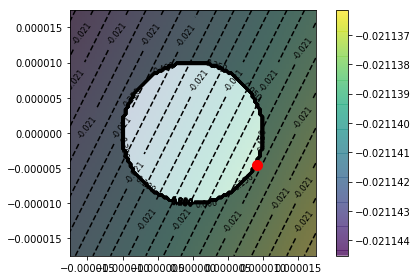

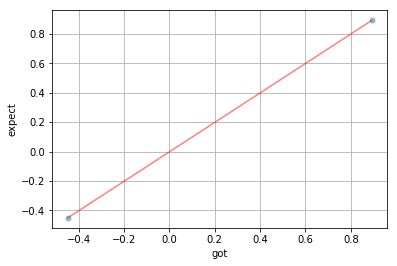

In [15]:
from arsenal.maths import compare, normalize
from arsenal.viz import contour_plot
from scipy.linalg import norm

eps = 1e-5
x0 = np.random.uniform(-1,1,size=D)
p = norm
Delta = lambda x,d: x+d
d = steepest(f, Delta, p, x0, eps=eps, visualize=True)
g0 = nd.Gradient(f)(x0)

compare(d / p(d), g0 / p(g0)).show();
#assert np.allclose(d / p(d), g0 / p(g0), rtol=0.05)

##### TL;DR notes on the code

- For comparing these directions, I'm using my vector comparison utility [arsenal.math.compare](https://github.com/timvieira/arsenal/blob/master/arsenal/math/compare.py), which gives me a bunch of detail metrics comparing the two vectors. This is sort of overkill for what we're using it for, but it was useful in debugging.

- Minor note: I'm using `scipy.linalg.norm` instead of `numpy.linalg.norm` because it is more numerically stable ([further reading](https://timvieira.github.io/blog/post/2014/11/10/numerically-stable-p-norms/)).

### Let's look at a slightly more interesting example.

I've written before about the [dimensional analysis of gradient descent](https://timvieira.github.io/blog/post/2016/05/27/dimensional-analysis-of-gradient-ascent/). In this post, I explain why the step-size parameter in gradient descent is hard to determine a priori because it is not unit free&mdash;in fact, its units are pretty complicated. One explanation for why this is the case is that we are using a silly metric on $x$ because the dimensions of $x$ are generally not in the same units, and this should not be compared without some type of common unit conversion!

Ok, let's do that. Suppose that we have a simple rule to map each dimension $x_i$ into a common currency, let's suppose the conversion is $\alpha_i x_i$ with $(\textbf{units } \alpha_i) = \frac{(\textbf{common-unit})}{ (\textbf{units } x_i)}$. Now it makes sense to compare $x, y \in \mathcal{X}$ with a rescaled Euclidean distance, $\| \alpha \odot (x - y) \|_2$ or for, our purposes, $\rho(x) = \| \alpha \odot x \|^2_2$. For numerical-stability reasons, it's better to use the squared two-norm and pass in $\varepsilon^2$ which is, of course, mathematically equivalent.

The most notable thing about this example is that it demonstrates that the gradient is *covariant*: the conversion factor is *inverted* in the steepest-ascent direction.

100.0% (10000/10000) [================================================] 00:00:00
100.0% (10000/10000) [================================================] 00:00:00



Comparison: n=2
  norms: [1, 1]
  zero F1: 1
  pearson: 1
  spearman: 1
  Linf: 0.000143981
  same-sign: 100.0% (2/2)
  max rel err: 0.00026368
  regression: [1.000 0.000]
  expect is larger: 100.0% (2/2)



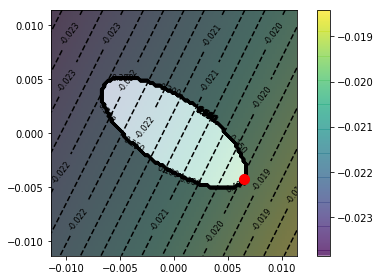

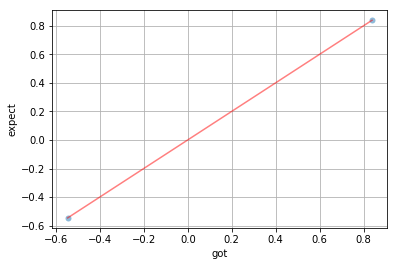

In [17]:
def assert_symmetric_positive_definite(A):
    e = np.linalg.eigvals(A)
    assert (e > 0).all(), e
    assert np.allclose(A, A.T)

def random_spd(D):
    AA = np.random.randn(D,D)
    U,S,Vt = np.linalg.svd(AA.dot(AA.T))
    S = np.abs(S) 
    S /= S.max()
    return U.dot(np.diag(S)).dot(Vt)

A = random_spd(D)
assert_symmetric_positive_definite(A)

if 0:
    p = lambda d: np.sqrt(d.T.dot(A).dot(d))
    #p.Hessian = lambda d: 0.5/p(d) * (A + A.T)  # Hessian of a weighted p-norms are undefined at zero!
else:
    p = lambda d: d.T.dot(A).dot(d)

sa = steepest(f, Delta, p, x0, eps, visualize=True)
ga = np.linalg.solve(A, nd.Gradient(f)(x0))          # covariant! linear transform is inverted!

sa *= 1 / norm(sa)
ga *= 1 / norm(ga)

compare(ga, sa).show();

## Cheaper, analytical answers with Taylor-series approximations

Since we've committed to studying changes of infinitesimal size, we can appeal to calculus to give us computationally cheap answers. Fundamentally, *derivatives* are less about *optimization* and more about *approximation*: "What will the response of the function $(\partial f)$ be to a small perturbation to its input $(\partial x)$?"

To derive a cheaper solution to our steepest ascent problem, we can leverage the infamous (truncated) [Taylor expansion](https://en.wikipedia.org/wiki/Taylor_series) approximation. (The Taylor expansion is an amazing hammer, which I [wrote about](https://timvieira.github.io/blog/post/2014/07/21/expected-value-of-a-quadratic-and-the-delta-method/) many years ago for approximating expectations of nonlinear functions.) In our case, this approximation can be used in both the objective and the constraints.

**Disclaimer**: Note this is only a semi-precise analysis, It's enough to convince ourselves that a more precise analysis is likely to exist (with some carefully chosen stipulations). A more precise analysis would require taking limits and good stuff like that.

**We'll start by approximating the objective...**

The (first-order) Taylor expansion of $f$ is a locally linear approximation to $f$,

$$
\widehat{f_a}(x) \overset{\text{def}}{=} f(a) + \nabla f(a)^\top (x - a).
$$

So long as $|x-a|$ is small the approximation is fairly accurate

$$
f(x) = \widehat{f_a}(x) + \mathcal{O}(|x-a|)
$$

Lucky for us we are in the small $|x-a|$ regime!

Our linearized steepest-direction problem is now

$$
\begin{eqnarray}
d^*
&=& \underset{\rho(\Delta_d) = \varepsilon}{\textrm{argmax }} \widehat{f_a}(x + d) \\
&=& \underset{\rho(\Delta_d) = \varepsilon}{\textrm{argmax }} f(x) + \nabla f(x)^\top d \\
&=& \underset{\rho(\Delta_d) = \varepsilon}{\textrm{argmax }} \nabla f(x)^\top d.
\end{eqnarray}
$$

**Numerical Taylor approximation**

In [18]:
# Visualize the quadratic approximation to the constraint boundary.
#Q = nd.Hessian(p)(0 * x0)
#phat = lambda d: 0.5 * d.T.dot(Q).dot(d)
#z = 1.75*max(np.abs(opt).max(), eps)    
#X = Y = [-z, z, 100]
#contour_plot(lambda d: f(Delta(x0, d)), X, Y); pl.colorbar()
#contour_plot(lambda d: float(phat(d) <= eps), X, Y, color='Reds_r')
#contour_plot(lambda d: float(p(d) <= eps), X, Y, color='Blues_r')

In [19]:
# This version also works
#def steepest2(f, p, x0, **kw):
#    "Numerical solution to the Taylor approximated objective."
#    g = nd.Gradient(f)(x0)        # linear approximation to objective
#    Q = nd.Hessian(p)(x0 * 0)
#    assert_symmetric_positive_definite(Q)
#    fhat = lambda d: g.dot(d)
#    phat = lambda d: 0.5 * d.T.dot(Q).dot(d)   # quadratic approximation to constraint.    
#    return steepest(fhat, Delta, p, x0, **kw)

def steepest3(f, p, x0, eps=1e-4):
    "Analytic solution to the Taylor approximated objective."
    g = nd.Gradient(f)(x0)        
    Q = nd.Hessian(p)(0 * x0)
    assert_symmetric_positive_definite(Q)    
    x = np.linalg.solve(0.5 * Q / eps, g)
    x = x / np.sqrt(g.dot(x))
    return x

100.0% (10000/10000) [================================================] 00:00:00
100.0% (10000/10000) [================================================] 00:00:00
/home/timv/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3020: RuntimeWarning: invalid value encountered in double_scalars
  prob = _betai(0.5*df, 0.5, df/(df+t_squared))



Comparison: n=2
  norms: [0.00775687, 0.00775621]
  zero F1: 1
  pearson: 1
  spearman: 1
  Linf: 1.47653e-06
  same-sign: 100.0% (2/2)
  max rel err: 0.000348599
  regression: [1.000 -0.000]
  got is larger: 100.0% (2/2)



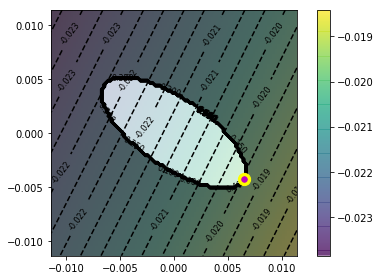

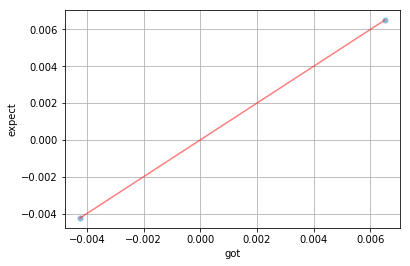

In [20]:
sa = steepest(f, Delta, p, x0, eps, visualize=1)
opt = steepest3(f, p, x0, eps=eps)
#opt = steepest2(f, p, x0, eps=eps)

pl.scatter([opt[0]], [opt[1]], s=150, c='yellow', zorder=1000, alpha=1.)
pl.scatter([sa[0]], [sa[1]], s=30, c='m', zorder=1000, alpha=1.)
compare(sa, opt).show();
#assert np.allclose(sa, opt)

### Application: Steepest ascent under different p-norms

We saw $L_2$ norms and weighted $L_2$ norms above. Here will see that $L_1$ and $L_\infty$ have pretty neat interpretations. 
We have an optimization problem of the following form each $p$
$$
d^* = \underset{\|d\|_p = \varepsilon}{\textrm{argmax }} \nabla f(x)^\top d
$$

Each choice of [$p$-norm](https://en.wikipedia.org/wiki/Lp_space) gives rise to a differently shaped constraint set and thus has different answers! We visualize each constraint set for the two-dimensional case for $p=1, 2, \text{ and }\infty$.

##### Drawing constraint boundaries

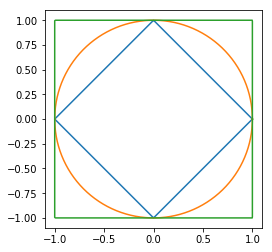

In [21]:
eps = 1.0

def draw_norm(p, eps, **kwargs):
    ts = np.linspace(0, np.pi*2, 1000)
    zs = np.vstack((np.cos(ts), np.sin(ts))).T         # unit sphere
    xs, ys = np.array([z * eps / p(z) for z in zs]).T  # renormalize the unit sphere
    pl.plot(xs, ys, **kwargs)
    pl.gca().set_aspect('equal')

for p in [1, 2, np.inf]:
    draw_norm(lambda x: norm(x, p), eps)

### $L_1$

Maximizing the linearized objective under the $L_1$ polytope is a linear program. Unless the gradient is not parallel to the boundary of the polytope (i.e., a tie), we know that the optimum is at a corner! The corners, in this case, are one-hot vectors of length with $\pm \varepsilon$ as their single active value. We maximize the linearized objective by taking it's largest magnitude entry of the gradient and its sign, 

$$
k = \textrm{argmax}_i |g_i| \\
d^* = \varepsilon \cdot \textrm{onehot}(k, D) \cdot \textrm{sign}(g_k)
$$

In [28]:
def steepest_l1_analytical(f, x0, eps):
    x0 = np.zeros_like(x0)
    g0 = nd.Gradient(f)(x0)
    hottest = np.argmax(np.abs(g0))
    return onehot(hottest, D) * eps * np.sign(g0[hottest])

def steepest_l1_numerical(f, x0, eps):
    # An easier way to optimize L1 is to rotate the parameter space and use Linf (i.e., easy box constraints).
    g = nd.Gradient(f)
    x0 = np.zeros_like(x0)
    g0 = g(x0)
    # Create a linear program for the linear maximization over the L1-polytope.
    A_ub = np.array([
        [-1, -1],
        [+1, +1],
        [+1, -1],
        [-1, +1],
    ])
    b_ub = np.array([
        eps,
        eps,
        eps,
        eps,
    ])
    opt = linprog(-g0, A_ub=A_ub, b_ub=b_ub, bounds=[(None, None)]*2)
    assert opt.success, opt.message
    return opt

100.0% (10000/10000) [================================================] 00:00:00


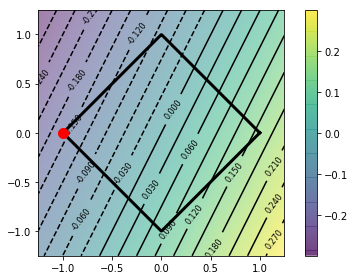

In [31]:
from scipy.optimize import linprog
from arsenal.viz import contour_plot
from arsenal.maths import onehot

f = lambda x: np.cos(x[0]+0.75*x[1]+0.5)

eps = 1
p = lambda z: norm(z, 1)
draw_norm(p, eps, c='k', lw=3)

D = 2

analytical = steepest_l1_analytical(f, x0, eps)
numerical = steepest_l1_numerical(f, x0, eps).x
assert np.allclose(analytical, numerical)

contour_plot(lambda x: g0.dot(x), [-1.25*eps, 1.25*eps, 100], [-1.25*eps, 1.25*eps, 100])
#contour_plot(f, [-1.25*eps, 1.25*eps, 100], [-1.25*eps, 1.25*eps, 100])

pl.colorbar()
pl.scatter([analytical[0]], [analytical[1]], c='r', s=100, zorder=10);

### $L_\infty$

Under similar conditions to "no ties," the gradient direction is maximized with a corner on the $\varepsilon$-unit box. The corners of the unit box are the sign function!

Therefore, steepest ascent in $L_\infty$ is just the sign of the gradient!

100.0% (10000/10000) [================================================] 00:00:00


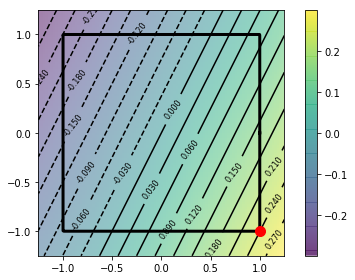

In [33]:
# Analytical solution is simple: just the sign of the gradient!
analytical = np.sign(g0) * eps

# visualize the norm constraint
p = lambda z: np.abs(z).max()
draw_norm(p, eps, lw=3, c='k')

# The L-inf norm is an easy box-constrained problem.
opt = minimize(lambda x: -g0.dot(x), 0*x0, bounds=[(-eps, eps)]*2)
assert opt.success, opt.message

# Make sure we got what was expected!
numerical = opt.x
assert np.allclose(numerical, analytical)
contour_plot(lambda x: g0.dot(x), [-1.25*eps, 1.25*eps, 100], [-1.25*eps, 1.25*eps, 100])
pl.colorbar()

pl.scatter([opt.x[0]], [opt.x[1]], c='r', s=100, zorder=10);

## Multiplicative updates

Just for fun, let's work out an example of a multiplicative update.

/home/timv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
100.0% (10000/10000) [================================================] 00:00:00
100.0% (10000/10000) [================================================] 00:00:00


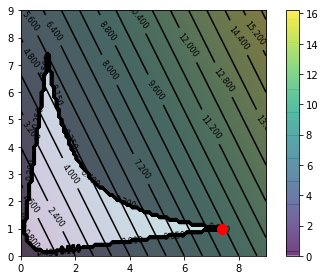

In [34]:
from arsenal.maths import entropy, kl_divergence, softmax
from scipy.optimize import minimize
from arsenal.viz import contour_plot

def Delta(x, d): return x*d

def steepest_mul(f, p, x, eps):
    opt = minimize(lambda d: -f(Delta(x, d)),
                   x0 = np.ones_like(x),   # multiplicative updates should start at one!
                   options = dict(maxiter = 5000),
                   bounds = [(0, None)]*len(x),
                   constraints = [{'fun': lambda d: eps - p(d), 'type': 'ineq'}])
    assert opt.success, opt.message
    return opt

D = 2; x0 = np.array([.4, .6]); r = np.array([3, 1])
def f(x): return x.dot(r)
p = lambda d: np.abs(np.log(d)).sum()

eps = 2.0   # crank-up epsilon to see that the constraint boundary is nonconvex.
opt = steepest_mul(f, p, x0, eps=eps)

X = [max(0, 1-3*eps), 1+4*eps, 100]
Y = [max(0, 1-3*eps), 1+4*eps, 100]

pl.figure()
contour_plot(lambda d: f(Delta(x0, d)), X, Y); pl.colorbar()
contour_plot(lambda d: float(p(d) <= eps), X, Y, color='binary_r')
pl.scatter([opt.x[0]], [opt.x[1]], c='r', s=100, zorder=10);

Multiplicative updates are much easier to work with geometrically if we switch to log-space.  This is because because p goes from L1-of-log (nonconvex) -> L1 (convex). This whole thing is equivalent to additive steepest-ascent in log space.  So here we see our friend L1 again.

100.0% (10000/10000) [================================================] 00:00:00
100.0% (10000/10000) [================================================] 00:00:00


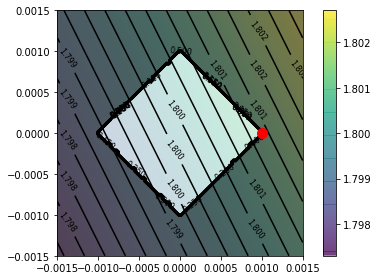

In [36]:
eps = .001

X = [-1.5*eps, 1.5*eps, 100]
Y = [-1.5*eps, 1.5*eps, 100]

def Delta(x, d): return x*np.exp(d)

def steepest_mul_logspace(f, p, x, eps):
    opt = minimize(lambda d: -f(Delta(x, d)),
                   x0 = np.zeros_like(x),
                   options = dict(maxiter = 10000),
                   constraints = [{'fun': lambda d: eps - p(d), 'type': 'ineq'}])
    assert opt.success, opt.message
    return opt

p = lambda d: np.abs(d).sum()
opt = steepest_mul_logspace(f, p, x0, eps)

contour_plot(lambda d: f(Delta(x0, d)), X, Y); pl.colorbar()
contour_plot(lambda d: float(p(d) <= eps), X, Y, color='binary_r')
pl.scatter([opt.x[0]], [opt.x[1]], c='r', s=100, zorder=10);

## Summary

In this post, we talked about steepest ascent in a number of different space (i.e., under different metrics).  We even touched on the idea of non-additive changes.  We saw that under the $L_1$ and $L_\infty$ metrics we get some really cute interpretations of what the steepest direction is!


Further reading:
- Marc Toussaint, [Some notes on gradient descent](https://ipvs.informatik.uni-stuttgart.de/mlr/marc/notes/gradientDescent.pdf).